##Task 3

##Rotating magnetic field and inductance calculation

##February 14, 2024


# 1. solution of the first part of the task.
#*   Draw or graph the result rotating magnetic field in Python (Colab). 74, They are the last digits of my ID


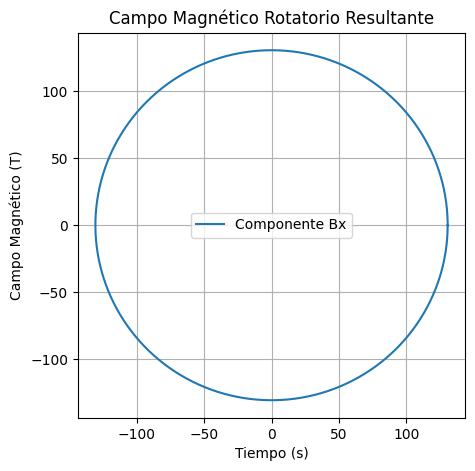

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
Bm = 174  # Magnitud máxima del campo magnético
frecuencia = 60  # Frecuencia en Hz
omega = 2 * np.pi * frecuencia  # Frecuencia angular
T = 1 / frecuencia  # Periodo en segundos
t = np.linspace(0, T, 1000)  # Tiempo para un ciclo completo de 60 Hz

# Componentes del campo magnético para cada fase
BA = Bm * np.cos(omega * t)
BB = Bm * np.cos(omega * t - 2*np.pi/3) * np.cos(2*np.pi/3)
BC = Bm * np.cos(omega * t + 2*np.pi/3) * np.cos(-2*np.pi/3)

# Componentes del campo magnético rotatorio resultante en el tiempo
Bx = BA + BB*np.cos(2*np.pi/3) + BC*np.cos(2*np.pi/3)
By = BB*np.sin(np.pi/3) + BC*np.sin(-np.pi/3)

# Gráfico del campo magnético rotatorio resultante en función del tiempo
plt.figure(figsize=(5, 5))
plt.plot(Bx, By, label='Balanceado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Campo Magnético (T)')
plt.title('Campo Magnético Rotatorio Resultante')
plt.grid(True)
plt.legend()
plt.show()







#*   Now, assume that the three-phase current are unbalanced and draw or graph the result rotating magnetic field in Python (Colab).



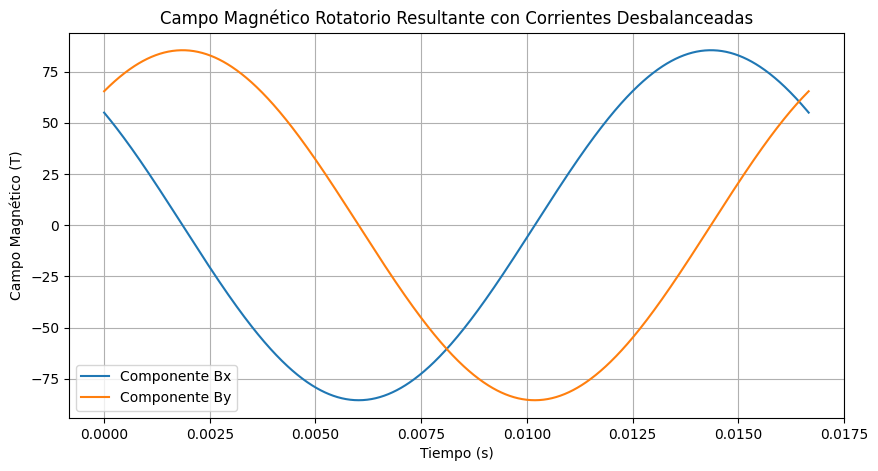

In [ ]:
# Desfasajes y factores de magnitud para el desbalance
delta = np.pi / 18  # Pequeño desfase para la fase B
epsilon = -np.pi / 18  # Pequeño desfase para la fase C

# Componentes del campo magnético para cada fase desbalanceada
BA = Bm * np.cos(omega * t)
BB = 0.8 * Bm * np.cos(omega * t - 2*np.pi/3 + delta)
BC = 1.2 * Bm * np.cos(omega * t + 2*np.pi/3 + epsilon)

# Componentes del campo magnético rotatorio resultante en el tiempo
Bx = BA + BB + BC
By = (Bm * np.sin(omega * t)) + (0.8 * Bm * np.sin(omega * t - 2*np.pi/3 + delta)) + (1.2 * Bm * np.sin(omega * t + 2*np.pi/3 + epsilon))

# Gráfico del campo magnético rotatorio resultante en función del tiempo
plt.figure(figsize=(10, 5))
plt.plot(t, Bx, label='Componente Bx')
plt.plot(t, By, label='Componente By')
plt.xlabel('Tiempo (s)')
plt.ylabel('Campo Magnético (T)')
plt.title('Campo Magnético Rotatorio Resultante con Corrientes Desbalanceadas')
plt.grid(True)
plt.legend()
plt.show()




"Se introdujeron cambios de fase 𝛿 y 𝜖 en las fases B y C de una máquina síncrona para desequilibrarlas con respecto a la fase A. Además, las magnitudes de las fases B y C se ajustaron a 0,8 y 1,2 veces la magnitud de la fase A, respectivamente , para reflejar un desequilibrio en las corrientes. Se calculó el campo magnético giratorio resultante, incluyendo los componentes 𝐵𝑥 y 𝐵𝑦, lo que nos permitió visualizar cómo este desequilibrio afecta la forma del campo magnético".

El **desbalance** en las *corrientes* de un motor síncrono provoca fluctuaciones en el par, lo que puede producir vibraciones mecánicas y reducir la vida útil de los componentes. No obstante, estas *corrientes* **desbalanceadas** causan pérdidas adicionales por *corrientes* parásitas en el núcleo, disminuyendo la eficiencia global del motor. Por otra parte, el **desbalance** también introduce distorsiones armónicas que afectan la calidad de la energía y generan *corrientes* adicionales en los devanados, contribuyendo al calentamiento no uniforme de los elementos de la maquina. Este calentamiento localizado se caracteriza por incrementar la resistencia en los devanados y llevar a fallos por sobrecalentamiento[^1].

[^1]: Chapman, S. J. (2012). de Máquinas.



#*   Now, include harmonic in the three-phase current of synchronous machine and draw or graph the result rotating magnetic field in Python (Colab).



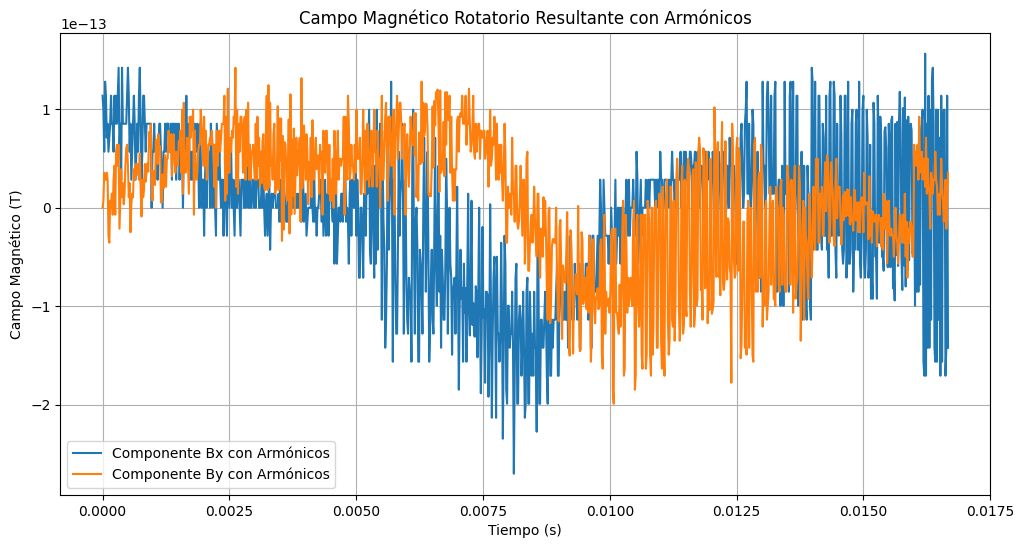

In [ ]:
# Parámetros de los armónicos
armonic_order = 3  # Orden del armónico (tercer armónico)
harmonic_magnitude = 0.3  # Magnitud del armónico

# Corrientes en las fases con armónicos
IA = Bm * (np.cos(omega * t) + harmonic_magnitude * np.cos(armonic_order * omega * t))
IB = Bm * (np.cos(omega * t - 2*np.pi/3) + harmonic_magnitude * np.cos(armonic_order * omega * t - 2*np.pi/3))
IC = Bm * (np.cos(omega * t + 2*np.pi/3) + harmonic_magnitude * np.cos(armonic_order * omega * t + 2*np.pi/3))

# Componentes del campo magnético para cada fase con armónicos
BA = IA
BB = IB
BC = IC

# Componentes del campo magnético rotatorio resultante en el tiempo
Bx = BA + BB + BC
By = (Bm * np.sin(omega * t)) + (Bm * np.sin(omega * t - 2*np.pi/3)) + (Bm * np.sin(omega * t + 2*np.pi/3)) \
     + (harmonic_magnitude * Bm * np.sin(armonic_order * omega * t)) + (harmonic_magnitude * Bm * np.sin(armonic_order * omega * t - 2*np.pi/3)) + (harmonic_magnitude * Bm * np.sin(armonic_order * omega * t + 2*np.pi/3))

# Gráfico del campo magnético rotatorio resultante en función del tiempo
plt.figure(figsize=(12, 6))
plt.plot(t, Bx, label='Componente Bx con Armónicos')
plt.plot(t, By, label='Componente By con Armónicos')
plt.xlabel('Tiempo (s)')
plt.ylabel('Campo Magnético (T)')
plt.title('Campo Magnético Rotatorio Resultante con Armónicos')
plt.grid(True)
plt.legend()
plt.show()


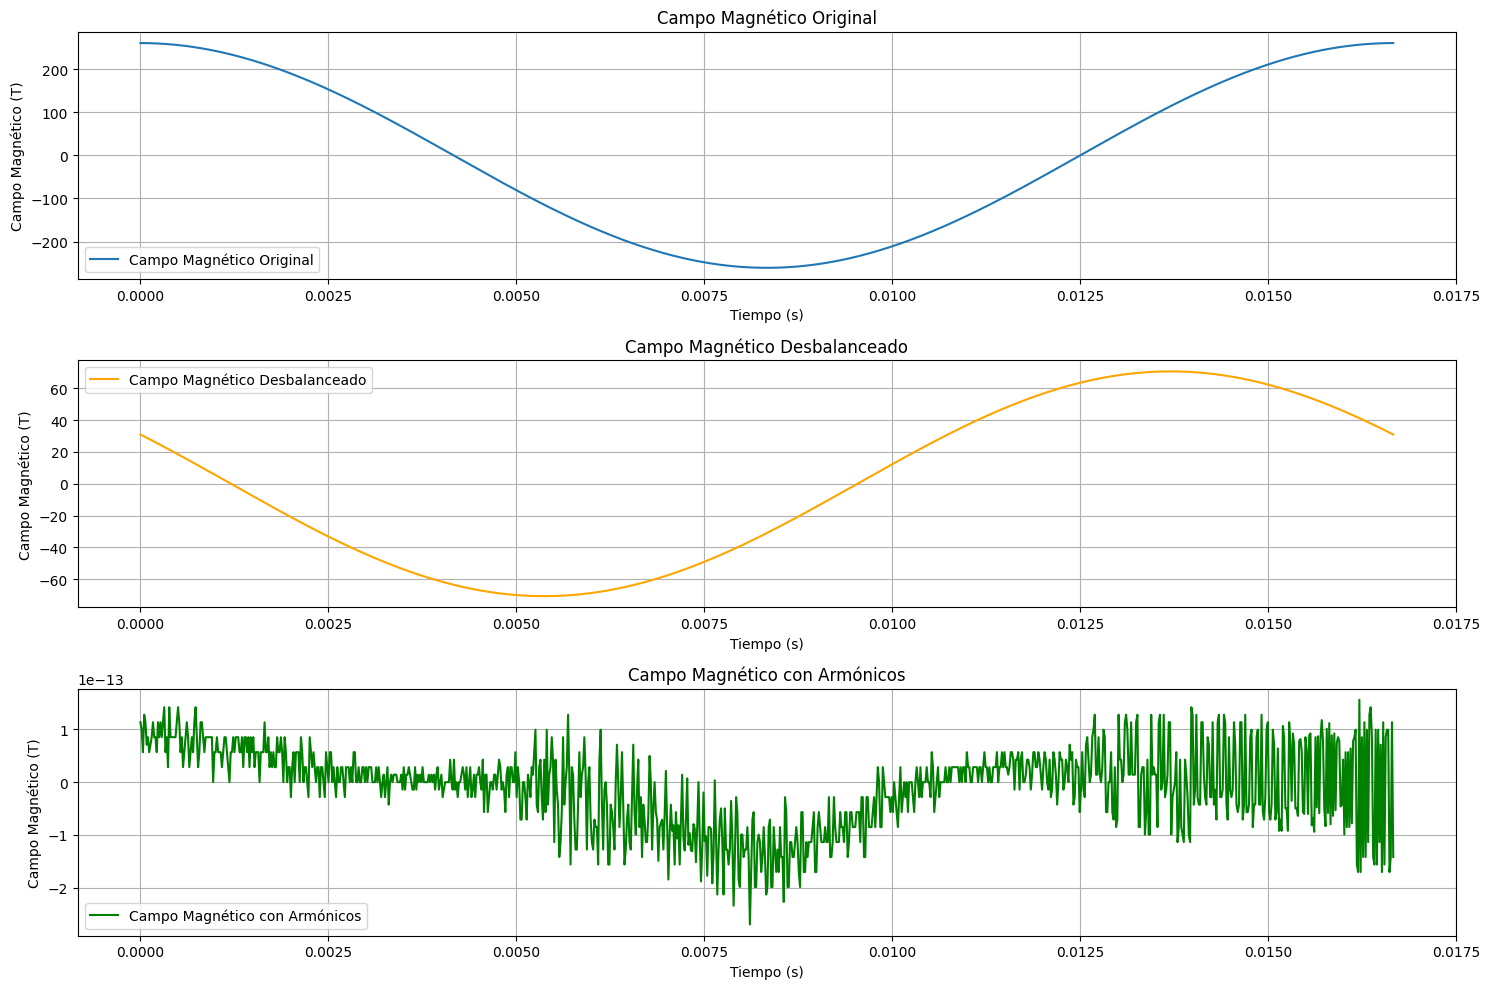

In [ ]:
#GRAFICOS COMPARATIVOS: ORIGINAL VS DESBALANCEADO VS CON ARMONICOS EN LAS CORRIENTES

# Parámetros para desbalance y armónicos
delta = 0.1  # Desbalance de fase en radianes
epsilon = -0.1  # Desbalance de fase en radianes
armonic_order = 3  # Orden del armónico
harmonic_magnitude = 0.3  # Magnitud del armónico

# Campo Magnético Original
BA_orig = Bm * np.cos(omega * t)
BB_orig = Bm * np.cos(omega * t - 2*np.pi/3) * np.cos(2*np.pi/3)
BC_orig = Bm * np.cos(omega * t + 2*np.pi/3) * np.cos(-2*np.pi/3)
Bx_orig = BA_orig + BB_orig + BC_orig

# Campo Magnético Desbalanceado
BA_bal = Bm * np.cos(omega * t)
BB_bal = 0.8 * Bm * np.cos(omega * t - 2*np.pi/3 + delta)
BC_bal = 1.2 * Bm * np.cos(omega * t + 2*np.pi/3 + epsilon)
Bx_bal = BA_bal + BB_bal + BC_bal

# Campo Magnético con Armónicos
IA = Bm * (np.cos(omega * t) + harmonic_magnitude * np.cos(armonic_order * omega * t))
IB = Bm * (np.cos(omega * t - 2*np.pi/3) + harmonic_magnitude * np.cos(armonic_order * omega * t - 2*np.pi/3))
IC = Bm * (np.cos(omega * t + 2*np.pi/3) + harmonic_magnitude * np.cos(armonic_order * omega * t + 2*np.pi/3))
Bx_harm = IA + IB + IC

# Gráficos
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(t, Bx_orig, label='Campo Magnético Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Campo Magnético (T)')
plt.title('Campo Magnético Original')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, Bx_bal, label='Campo Magnético Desbalanceado', color='orange')
plt.xlabel('Tiempo (s)')
plt.ylabel('Campo Magnético (T)')
plt.title('Campo Magnético Desbalanceado')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, Bx_harm, label='Campo Magnético con Armónicos', color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Campo Magnético (T)')
plt.title('Campo Magnético con Armónicos')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Al incluir **armónicos** en las corrientes trifásicas de una máquina síncrona tiene un impacto significativo en su funcionamiento, afectando tanto la eficiencia como la vida útil de la máquina. Los **armónicos**, que son componentes de *frecuencia* múltiplo de la *frecuencia* fundamental, generan pérdidas adicionales por corrientes parásitas en las partes metálicas del núcleo debido a las rápidas variaciones del flujo magnético. Estas pérdidas pueden verse como calentamiento excesivo de la máquina, que degrada el aislamiento de los devanados y aumenta el riesgo de fallos mecánicos, reduciendo la vida útil de la máquina. Por otra parte, la presencia de **armónicos** incrementa las pérdidas por histéresis, contribuyendo aún más al sobrecalentamiento.No obstante, otro efecto crítico es el aumento de la Distorsión Armónica Total (THD), una medida cuantitativa del contenido **armónico** en las señales eléctricas. Un THD elevado puede provocar resonancias, sobrecalentamiento y fallos prematuros en otros componentes del sistema eléctrico, afectando la operación de la máquina y la estabilidad del sistema en general. Por ello, es crucial minimizar la presencia de **armónicos** y aplicar técnicas de mitigación para asegurar un rendimiento óptimo y prolongar la vida útil del equipo.
Fitzgerald, A. E., Kingsley, C., & Umans, S. D. (2003). Electric machinery[^2].
[^2]: Fitzgerald, A. E., Kingsley, C., & Umans, S. D. (2003). Electric machinery.



#*   Analyze the obtained results and conclude.



Se realizó un análisis detallado para cada punto respectivamente con base en bibliografía académica, al evidenciarse cambios significativos en el comportamiento de los gráficos, se incluye una imagen general para una mejor comparación.

#2. Graph in Python (Colab) the behavior of the inductances (L11, L12, L22) of the electromecian system presented in figure 1. Compare this behavior if the reluctance of the core is not considered. The second winding moves with a periodic speed as shown in the figure 2.

El objetivo del codigo análisis es **examinar** y **comparar** el **comportamiento** de las **inductancias** en un sistema electromecánico. En este estudio, se consideran dos casos principales: uno en el que se toma en cuenta la reluctancia del núcleo y otro en el que no se considera la reluctancia. El sistema bajo análisis dispone de dos devanados, siendo el segundo devanado el que se desplaza con una velocidad triangular periódica. Se lleva a cabo el análisis para observar cómo varían las inductancias de los devanados y la inductancia mutua a lo largo del tiempo debido al movimiento del segundo devanado. El enfoque se centra en evaluar cómo estos cambios afectan las propiedades inductivas del sistema en función de la presencia o ausencia de reluctancia en el núcleo.


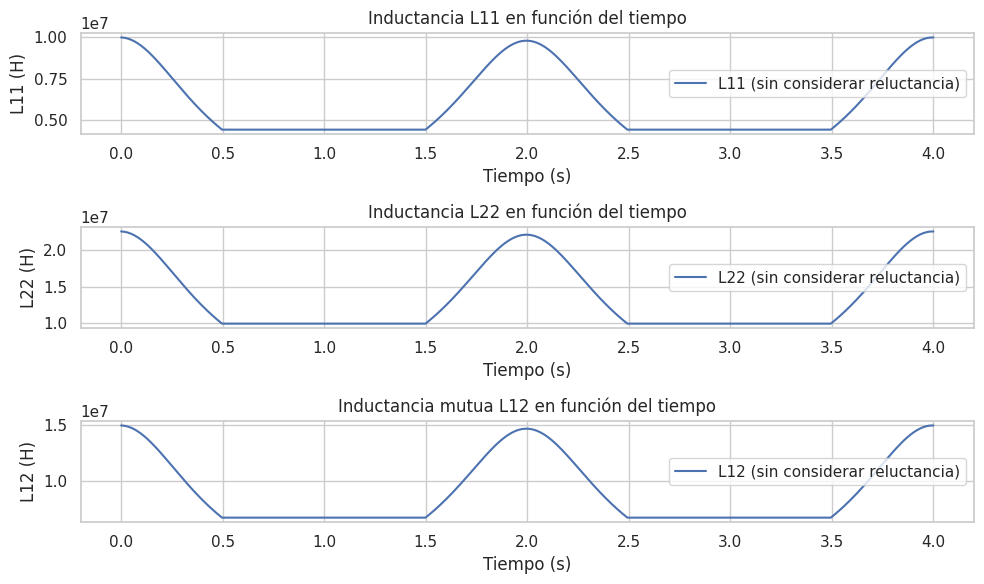

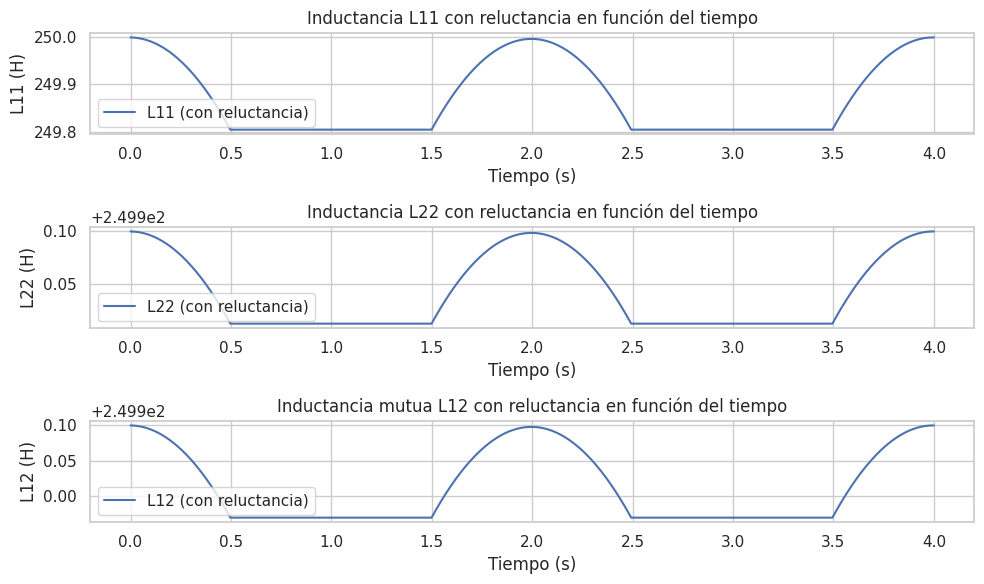

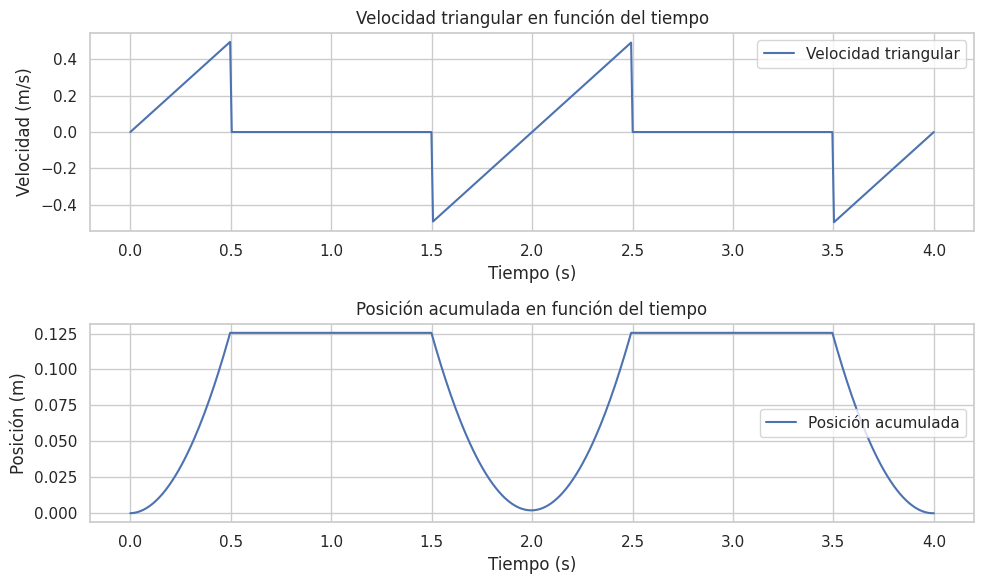

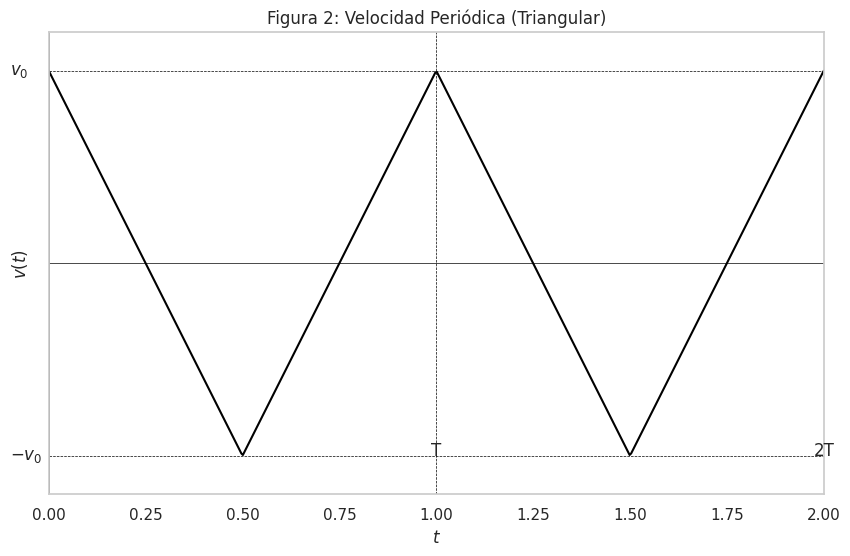

In [ ]:
# Parámetros dados
mu = 5000  # Permeabilidad del núcleo (H/m)
l = 0.1  # Longitud media del núcleo (m)
A = 0.005  # Área de la sección transversal (m^2)
N1 = 200  # Número de vueltas del devanado 1
N2 = 300  # Número de vueltas del devanado 2
v0 = 0.5  # Amplitud de la velocidad (m/s)
T = 2.0  # Periodo de la velocidad (s)

# Función de velocidad triangular
def v(t):
    return 4*v0*(t/T - np.floor(t/T + 0.5)) * (np.abs(2*(t/T - np.floor(t/T + 0.5))) <= 0.5)

# Definir el tiempo de simulación
t = np.linspace(0, 2*T, 500)  # tiempo de 0 a 2T con 500 puntos

# Posición del segundo devanado en función de la velocidad
x = np.cumsum(v(t)) * (t[1] - t[0])

# Calcular las inductancias L11, L12, L22
L11 = (mu * N1**2 * A) / (l + x)
L22 = (mu * N2**2 * A) / (l + x)
L12 = (mu * N1 * N2 * A) / (l + x)

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t, L11, label="L11 (sin considerar reluctancia)")
plt.xlabel('Tiempo (s)')
plt.ylabel('L11 (H)')
plt.title('Inductancia L11 en función del tiempo')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, L22, label="L22 (sin considerar reluctancia)")
plt.xlabel('Tiempo (s)')
plt.ylabel('L22 (H)')
plt.title('Inductancia L22 en función del tiempo')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, L12, label="L12 (sin considerar reluctancia)")
plt.xlabel('Tiempo (s)')
plt.ylabel('L12 (H)')
plt.title('Inductancia mutua L12 en función del tiempo')
plt.legend()

plt.tight_layout()
plt.show()


# Reluctancia del núcleo
R_core = l / (mu * A)

# Calcular las inductancias L11, L12, L22 considerando la reluctancia
L11_reluctancia = 1 / (R_core + x / (N1**2))
L22_reluctancia = 1 / (R_core + x / (N2**2))
L12_reluctancia = 1 / (R_core + x / (N1 * N2))

# Graficar los resultados con reluctancia
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t, L11_reluctancia, label="L11 (con reluctancia)")
plt.xlabel('Tiempo (s)')
plt.ylabel('L11 (H)')
plt.title('Inductancia L11 con reluctancia en función del tiempo')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, L22_reluctancia, label="L22 (con reluctancia)")
plt.xlabel('Tiempo (s)')
plt.ylabel('L22 (H)')
plt.title('Inductancia L22 con reluctancia en función del tiempo')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, L12_reluctancia, label="L12 (con reluctancia)")
plt.xlabel('Tiempo (s)')
plt.ylabel('L12 (H)')
plt.title('Inductancia mutua L12 con reluctancia en función del tiempo')
plt.legend()

plt.tight_layout()
plt.show()

# Datos de velocidad y posición
t = np.linspace(0, 2*T, 500)
velocity = v(t)
position = np.cumsum(velocity) * (t[1] - t[0])

# Graficar velocidad y posición
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, velocity, label='Velocidad triangular')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidad triangular en función del tiempo')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, position, label='Posición acumulada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.title('Posición acumulada en función del tiempo')
plt.legend()

plt.tight_layout()
plt.show()


# Parámetros
T = 1  # Periodo
v0 = 1  # Velocidad máxima

# Función de la velocidad triangular
def triangular_velocity(t, T, v0):
    return 4 * v0 * np.abs(((t/T) % 1) - 0.5) - v0

# Rango de tiempo
t = np.linspace(0, 2*T, 500)

# Calcular la velocidad
v = triangular_velocity(t, T, v0)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(t, v, color='black')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.axvline(T, color='black', linestyle='--', linewidth=0.5)
plt.axvline(2*T, color='black', linestyle='--', linewidth=0.5)
plt.axhline(v0, color='black', linestyle='--', linewidth=0.5)
plt.axhline(-v0, color='black', linestyle='--', linewidth=0.5)

# Etiquetas
plt.text(T, -v0, 'T', horizontalalignment='center')
plt.text(2*T, -v0, '2T', horizontalalignment='center')
plt.text(-0.1, v0, r'$v_0$', verticalalignment='center')
plt.text(-0.1, -v0, r'$-v_0$', verticalalignment='center')
plt.xlabel(r'$t$')
plt.ylabel(r'$v(t)$')

# Límites
plt.xlim(0, 2*T)
plt.ylim(-1.2*v0, 1.2*v0)

# Configuración de ticks en el eje y
plt.yticks([v0, -v0], [r'', r''])

# Título
plt.title('Figura 2: Velocidad Periódica (Triangular)')
plt.grid(False)

# Mostrar la gráfica
plt.show()


